In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk

import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Authentication
consumerKey = "l6sye3vZa6KOOrrDXyhMrPmEC"
consumerSecret = "nFmFrJYYBIDUxwqqbHrmRT47SpQ3t262W19Jl0nhYUaP0VbRHN"
accessToken = "1334431300204199936-00fqyszcV7kRof5yPDeMLR3OxzR0Aa"
accessTokenSecret = "r7Y9vDIQAfghoDKoRZ23pT9sCYvV4R99TfmPhU9M4Hb29"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity

 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: STOCKMARKET
Please enter how many tweets to analyze: 2500


In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  794
negative number:  465
neutral number:  1241


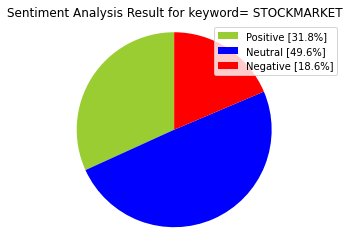

In [8]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list

,0
0,SweepCast 🦍 Unusual Options Observed : $RUN wi...
1,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...
2,RT @assetyogi: Top 5 Equity Schemes Based on 1...
3,HORIZONTAL LINES💡\n\n#boomingbulls #boomingbul...
4,"""The person who never bothers to think about t..."
...,...
2495,"RT @KirtanShahCFP: 🧵 on the global macros,\n\n..."
2496,RT @OptionsMaxPain: #Options Flow Stream Updat...
2497,RT @LnprCapital: Craftsman Automation Analysis...
2498,RT @Press_Reach: Rosenblatt Raises #Apple $AAP...


In [10]:
##tweet_list.drop_duplicates(inplace = True)

In [11]:
tweet_list.shape

(2500, 1)

In [12]:
2#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,SweepCast 🦍 Unusual Options Observed : $RUN wi...,🦍 : $ ...
1,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...
2,RT @assetyogi: Top 5 Equity Schemes Based on 1...,- ...
3,HORIZONTAL LINES💡\n\n#boomingbulls #boomingbul...,💡\n\n# # ...
4,"""The person who never bothers to think about t...",""" ..."
5,Investing is making few high quality decisions...,...
6,Price-tags of daily essentials rise up to 22% ...,- % ...
7,Top 5 Equity Schemes Based on 10-Year SIP Retu...,- ...
8,$FLNG's Aroon indicator drops into Downtrend o...,$ ' ...
9,@baapofchart Sir aapka Daly Trad pane ke liye ...,...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"

 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp
tw_list.head(10)



,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,SweepCast 🦍 Unusual Options Observed : $RUN wi...,🦍 : $ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @assetyogi: Top 5 Equity Schemes Based on 1...,- ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,HORIZONTAL LINES💡\n\n#boomingbulls #boomingbul...,💡\n\n# # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,"""The person who never bothers to think about t...",""" ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,Investing is making few high quality decisions...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
6,Price-tags of daily essentials rise up to 22% ...,- % ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,Top 5 Equity Schemes Based on 10-Year SIP Retu...,- ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,$FLNG's Aroon indicator drops into Downtrend o...,$ ' ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,@baapofchart Sir aapka Daly Trad pane ke liye ...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,2489,99.56
negative,11,0.44


In [16]:
import matplotlib.pyplot as plt


In [17]:
# create data for Pie Chart
##pichart = count_values_in_column(tw_list,"sentiment")
##names= pichart.index
##size=pichart["Percentage"]
 
# Create a circle for the center of the plot
##my_circle=plt.Circle( (0,0), 0.7, color='white')
##plt.pie(size, labels=names, colors=['green','blue','red'])
##p=plt.gcf()
##p.gca().add_artist(my_circle)
##plt.show()

In [18]:
#Function to Create Wordcloud
def create_wordcloud(text):
  mask = np.array(Image.open('/content/image.png'))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color="white",
                 mask = mask,
                 max_words=3000,
                 stopwords=stopwords,repeat=True)
  wc.generate(str(text))
  wc.to_file("wc.png")
  print("Word Cloud Saved Successfully")
  path="wc.png"
  display(Image.open(path))

Word Cloud Saved Successfully


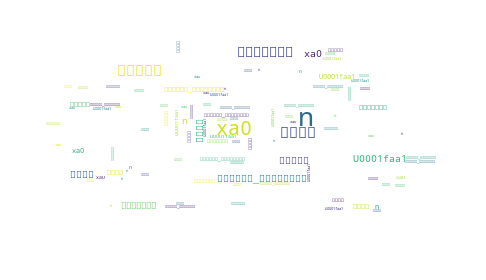

In [19]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

In [20]:
#Creating wordcloud for positive sentiment
##create_wordcloud(tw_list_positive["text"].values)

In [21]:
#Creating wordcloud for negative sentiment
##create_wordcloud(tw_list_negative["text"].values)

In [22]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,137.36
neutral,122.90


In [23]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,26.64
neutral,9.04


In [24]:
import nltk
nltk.download('stopwords')  
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,SweepCast 🦍 Unusual Options Observed : $RUN wi...,🦍 : $ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,12,🦍 ...,"[, ]","[, ]","[, ]"
1,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...,ونعم بالله \n\n#الفائدة #الاسهم_السعودية #تاس...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,134,18,ونعم بالله \n\nالفائدة الاسهمالسعودية تاسي\n ...,"[ونعم, بالله, الفائدة, الاسهمالسعودية, تاسي, ]","[ونعم, بالله, الفائدة, الاسهمالسعودية, تاسي, ]","[ونعم, بالله, الفائدة, الاسهمالسعودية, تاسي, ]"
2,RT @assetyogi: Top 5 Equity Schemes Based on 1...,- ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0,126,7,...,"[, ]","[, ]","[, ]"
3,HORIZONTAL LINES💡\n\n#boomingbulls #boomingbul...,💡\n\n# # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,131,11,💡\n\n ...,"[, ]","[, ]","[, ]"
4,"""The person who never bothers to think about t...",""" ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,7,...,"[, ]","[, ]","[, ]"


In [25]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
##1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

2500 Number of reviews has 252 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,á,é,í,ñ,ó,ú,או,את,בחוץ,...,월가에서,월엔,저가,전향,지구에서년환영해,𝐌𝐚𝐫𝐤𝐞𝐭,𝐑𝐞𝐭𝐮𝐫𝐧𝐬,𝐒𝐞𝐩𝐭𝐞𝐦𝐛𝐞𝐫,𝗠𝗮𝗿𝗸𝗲𝘁,𝗢𝘂𝘁𝗹𝗼𝗼𝗸
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
क,105
र,57
स,45
न,38
म,36
ज,33
य,32
ह,30
ट,29
ल,28


In [27]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('ดาวโจนส ดร', 13),
 ('ดร วง', 13),
 ('วง หล', 13),
 ('หล งสหร', 13),
 ('งสหร ฐเผยเง', 13),
 ('ฐเผยเง นเฟ', 13),
 ('นเฟ อส', 13),
 ('อส งกว', 13),
 ('งกว าคาด', 13),
 ('ชน ดาวโจนส', 8),
 ('าคาด ตกเศรษฐก', 8),
 ('ตกเศรษฐก จถดถอย', 8),
 ('าคาด ตกศก', 5),
 ('ตกศก ถดถอย', 5),
 ('ถดถอย ฐานเศรษฐก', 5),
 ('नय यम', 5),
 ('यम कल', 5),
 ('कल रह', 5),
 ('الفائدة الاسهم_السعودية', 3),
 ('الاسهم_السعودية تاسي', 3)]

In [28]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('ดาวโจนส ดร วง', 13),
 ('ดร วง หล', 13),
 ('วง หล งสหร', 13),
 ('หล งสหร ฐเผยเง', 13),
 ('งสหร ฐเผยเง นเฟ', 13),
 ('ฐเผยเง นเฟ อส', 13),
 ('นเฟ อส งกว', 13),
 ('อส งกว าคาด', 13),
 ('ชน ดาวโจนส ดร', 8),
 ('งกว าคาด ตกเศรษฐก', 8),
 ('าคาด ตกเศรษฐก จถดถอย', 8),
 ('งกว าคาด ตกศก', 5),
 ('าคาด ตกศก ถดถอย', 5),
 ('ตกศก ถดถอย ฐานเศรษฐก', 5),
 ('नय यम कल', 5),
 ('यम कल रह', 5),
 ('الفائدة الاسهم_السعودية تاسي', 3),
 ('पर अन घव', 3),
 ('रह मह लड', 2),
 ('मह लड अब', 2)]